# 03 — MDP OPE Walkthrough

We compare trajectory-based estimators on a synthetic MDP and interpret
horizon effects and diagnostics.

## Setup

```
pip install "causalrl[plots]"
```

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from crl.benchmarks.mdp_synth import SyntheticMDP, SyntheticMDPConfig
from crl.ope import evaluate
from crl.utils.seeding import set_seed
from crl.viz import configure_notebook_display, save_figure

In [2]:
set_seed(0)
np.random.seed(0)
configure_notebook_display()

## Run estimators

In [3]:
benchmark = SyntheticMDP(SyntheticMDPConfig(seed=0, horizon=5))
dataset = benchmark.sample(num_trajectories=200, seed=1)
true_value = benchmark.true_policy_value(benchmark.target_policy)

report = evaluate(
    dataset=dataset,
    policy=benchmark.target_policy,
    estimators=["is", "wis", "pdis", "dr", "fqe"],
)
summary = report.summary_table()
summary

,value,stderr,ci,diagnostics,assumptions_checked,assumptions_flagged,warnings,metadata,lower_bound,upper_bound,estimator
0,-3.082840,3.551091,"(-10.042977932983256, 3.8772969819633696)",{'overlap': {'min_behavior_prob': 0.0140824109...,"[sequential_ignorability, overlap]",[],[Effective sample size ratio below threshold; ...,"{'estimator': 'IS', 'num_trajectories': 200, '...",-10.042978,3.877297,IS
1,-0.045110,0.127437,"(-0.2948870684576913, 0.20466711264087695)",{'overlap': {'min_behavior_prob': 0.0140824109...,"[sequential_ignorability, overlap]",[],[Effective sample size ratio below threshold; ...,"{'estimator': 'WIS', 'num_trajectories': 200, ...",-0.294887,0.204667,WIS
2,52.903821,51.642935,"(-48.31633133827914, 154.12397393169556)",{'overlap': {'min_behavior_prob': 0.0140824109...,"[sequential_ignorability, overlap]",[],[Effective sample size ratio below threshold; ...,"{'estimator': 'PDIS', 'num_trajectories': 200,...",-48.316331,154.123974,PDIS
3,-85.134460,87.018072,"(-255.68988233413336, 85.42096150884583)",{'overlap': {'min_behavior_prob': 0.0140824109...,"[sequential_ignorability, overlap, markov]",[],[Effective sample size ratio below threshold; ...,"{'estimator': 'DR', 'config': {'num_folds': 2,...",-255.689882,85.420962,DR
4,1.814114,0.032358,"(1.750692867432645, 1.877534386617597)",{'overlap': {'min_behavior_prob': 0.0140824109...,"[sequential_ignorability, overlap, markov]",[],[Effective sample size ratio below threshold; ...,"{'estimator': 'FQE', 'config': {'hidden_sizes'...",1.750693,1.877534,FQE


## Visual comparison

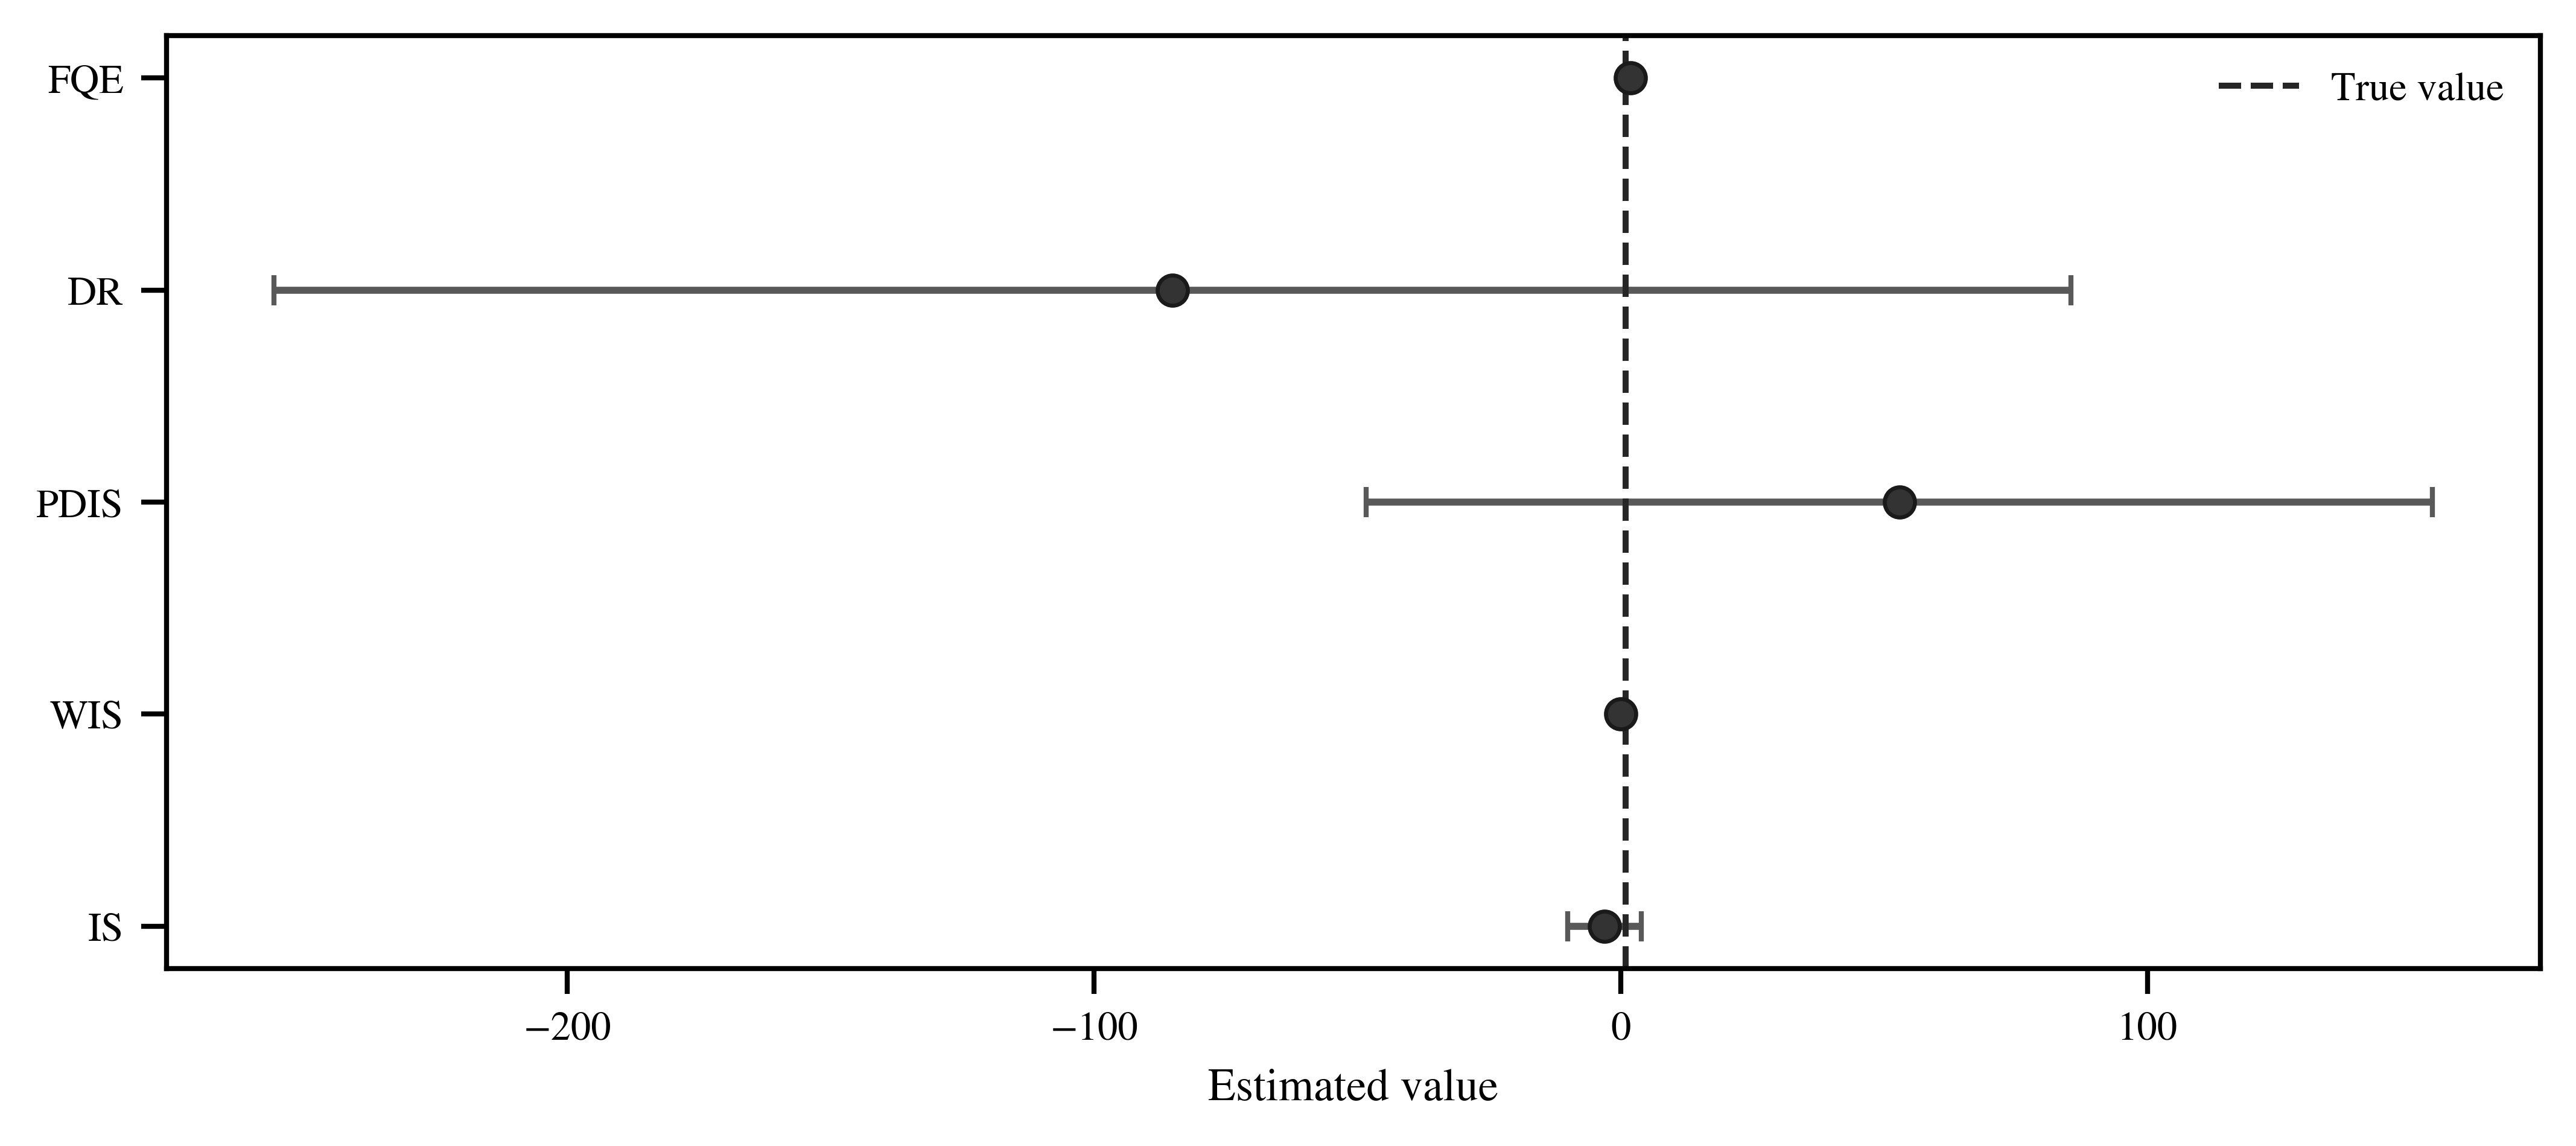

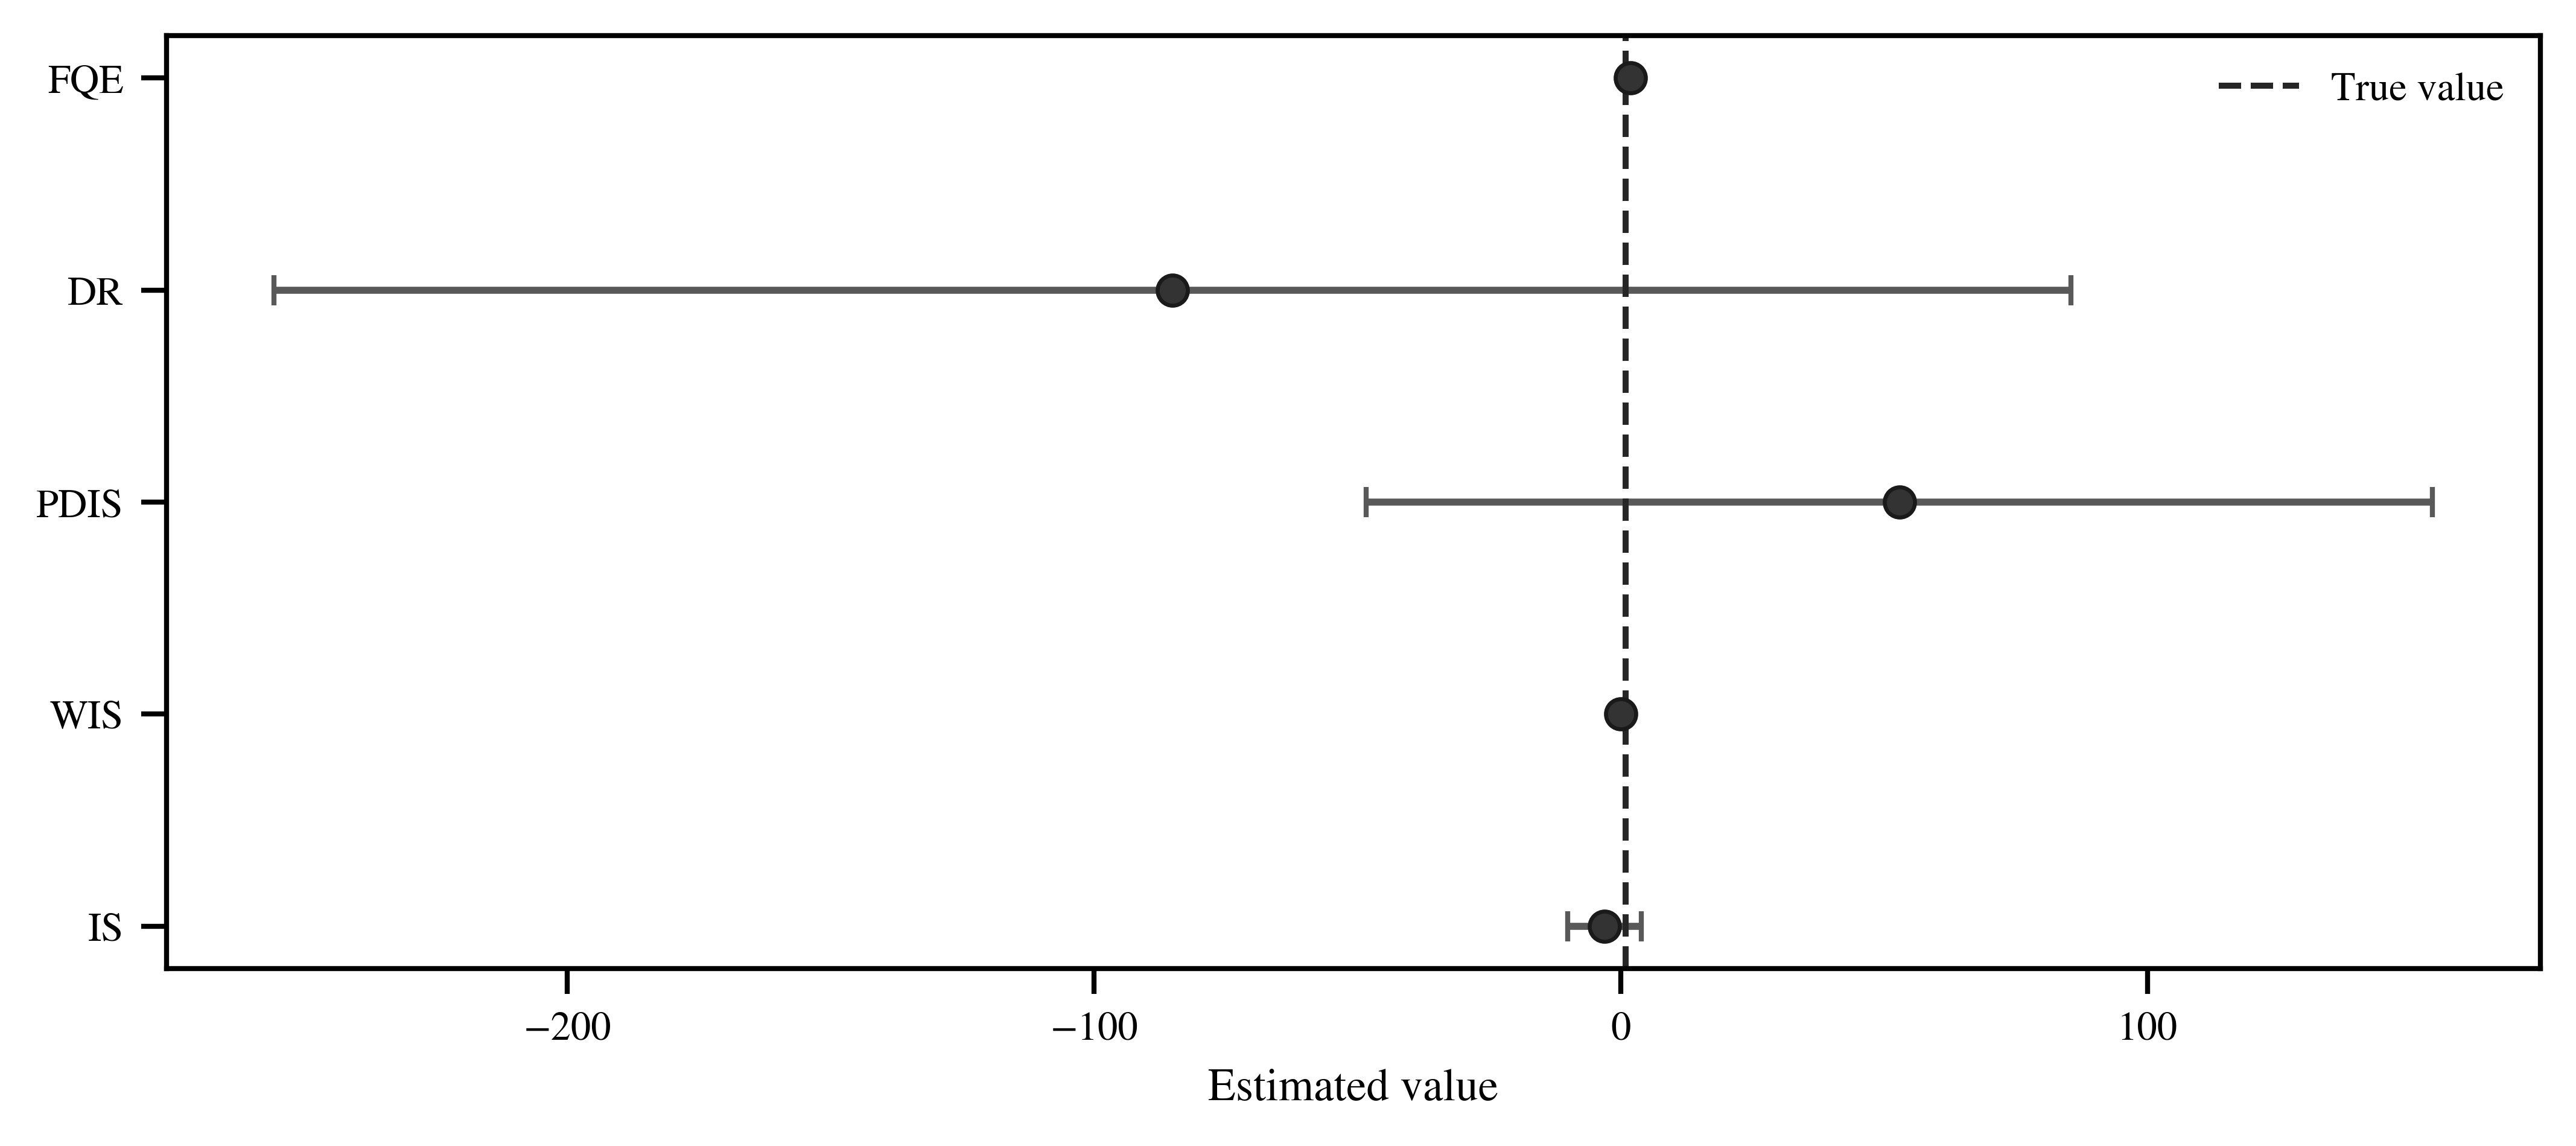

In [4]:
fig = report.plot_estimator_comparison(truth=true_value)
fig

## Save figures for docs

In [5]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig, output_dir / "mdp_walkthrough_estimator_comparison")

{'pdf': 'docs/assets/figures/mdp_walkthrough_estimator_comparison.pdf',
 'png': 'docs/assets/figures/mdp_walkthrough_estimator_comparison.png'}

## Takeaways

- Horizon length amplifies importance-weight variance.
- DR and FQE can reduce variance but introduce model bias.
- Always inspect diagnostics alongside point estimates.